# Desafio 4

Neste desafio, vamos praticar um pouco sobre testes de hipóteses. Utilizaremos o _data set_ [2016 Olympics in Rio de Janeiro](https://www.kaggle.com/rio2016/olympic-games/), que contém dados sobre os atletas das Olimpíadas de 2016 no Rio de Janeiro.

Esse _data set_ conta com informações gerais sobre 11538 atletas como nome, nacionalidade, altura, peso e esporte praticado. Estaremos especialmente interessados nas variáveis numéricas altura (`height`) e peso (`weight`). As análises feitas aqui são parte de uma Análise Exploratória de Dados (EDA).

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import seaborn as sns

In [12]:
# %matplotlib inline

# from IPython.core.pylabtools import figsize


# figsize(12, 8)

# sns.set()

In [3]:
athletes = pd.read_csv("athletes.csv")

In [4]:
athletes.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


In [5]:
def get_sample(df, col_name, n=100, seed=42):
    """Get a sample from a column of a dataframe.
    
    It drops any numpy.nan entries before sampling. The sampling
    is performed without replacement.
    
    Example of numpydoc for those who haven't seen yet.
    
    Parameters
    ----------
    df : pandas.DataFrame
        Source dataframe.
    col_name : str
        Name of the column to be sampled.
    n : int
        Sample size. Default is 100.
    seed : int
        Random seed. Default is 42.
    
    Returns
    -------
    pandas.Series
        Sample of size n from dataframe's column.
    """
    np.random.seed(seed)
    
    random_idx = np.random.choice(df[col_name].dropna().index, size=n, replace=False)
    
    return df.loc[random_idx, col_name]

## Inicia sua análise a partir daqui

In [6]:
# Sua análise começa aqui.
amostra_height = get_sample(athletes,"height", n=3000)
amostra_weight = get_sample(athletes,"weight", n=3000)

## Questão 1

Considerando uma amostra de tamanho 3000 da coluna `height` obtida com a função `get_sample()`, execute o teste de normalidade de Shapiro-Wilk com a função `scipy.stats.shapiro()`. Podemos afirmar que as alturas são normalmente distribuídas com base nesse teste (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

In [45]:
def q1():
    # Retorne aqui o resultado da questão 1.
    sts, p_value = sct.shapiro(amostra_height)
    print(sts, p_value)
    alpha = 0.05
    if p_value > alpha:
        return True
    else:
        return False
    pass
q1()

0.9961519837379456 5.681722541339695e-07


False

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Plote o qq-plot para essa variável e a analise.
* Existe algum nível de significância razoável que nos dê outro resultado no teste? (Não faça isso na prática. Isso é chamado _p-value hacking_, e não é legal).

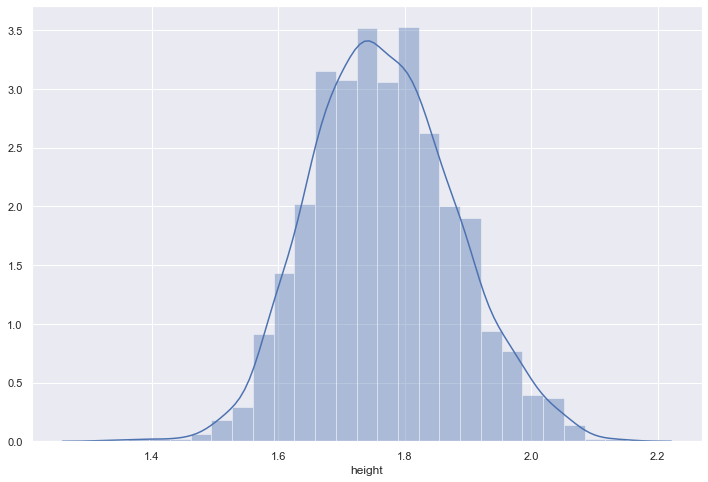

In [13]:
sns.distplot(amostra_height, bins = 25);

nossa

* Segundo o teste de shapiro nossa hipotese nula é falsa, ou seja, nossa distribuição não é de uma população normal, porém observando o histograma, 
temos o classico padrão de "sino" de uma distribuição normal, então não parece tão condizente assim

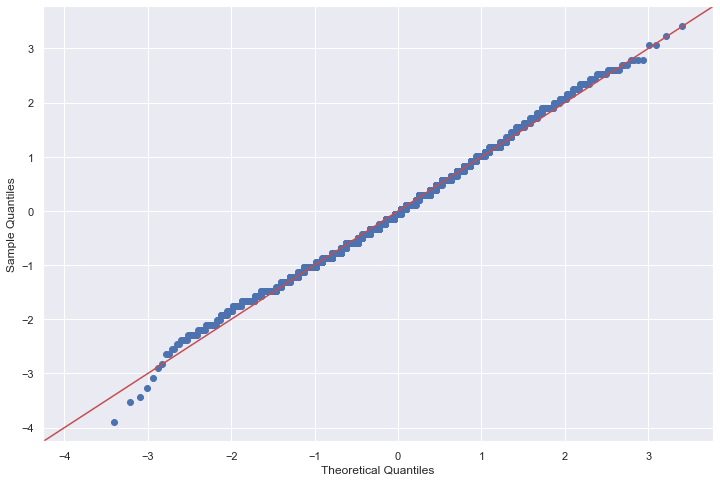

In [15]:
import statsmodels.api as sm
sm.qqplot(amostra_height, fit=True, line="45");

* - aqui verificamos o mesmo problema acima, apesar do teste de shapiro, o qqplot indica uma distribuição normal, afinal quase todos os pontos seguem a linhad e 45 graus
*  - será que apenas as amostras localizadas fora da linha entre os quantiles -4 e -3 são suficientes para influeciar o teste de shapiro a ponto de deixa nossa hipotese nula falsa?

## Questão 2

Repita o mesmo procedimento acima, mas agora utilizando o teste de normalidade de Jarque-Bera através da função `scipy.stats.jarque_bera()`. Agora podemos afirmar que as alturas são normalmente distribuídas (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

In [52]:
def q2():
    # Retorne aqui o resultado da questão 2.
    sts, p_value = sct.jarque_bera(amostra_height)
    print(sts, p_value)
    alpha = 0.05
    if p_value > alpha:
        return True
    else:
        return False
    pass
q2()

13.03363513594265 0.001478366424594868


False

__Para refletir__:

* Esse resultado faz sentido?

* - O teste de jarque-bera está indicando o mesmo resultado do de shapiro, ou seja, indica que se trata de uma distribuição não normalizada 

## Questão 3

Considerando agora uma amostra de tamanho 3000 da coluna `weight` obtida com a função `get_sample()`. Faça o teste de normalidade de D'Agostino-Pearson utilizando a função `scipy.stats.normaltest()`. Podemos afirmar que os pesos vêm de uma distribuição normal ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

In [54]:
def q3():
    # Retorne aqui o resultado da questão 3.
    sts, p_value = sct.normaltest(amostra_weight)
    alpha = 0.05
    if p_value > alpha:
        return True
    else:
        return False
    pass
q3()

False

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Um _box plot_ também poderia ajudar a entender a resposta.

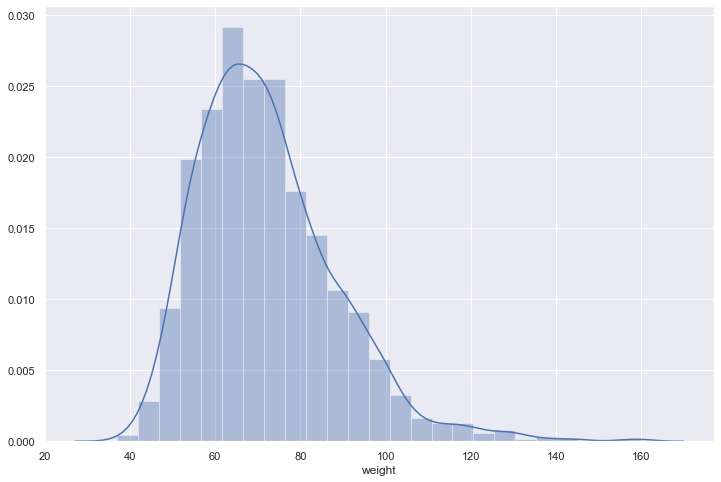

In [55]:
sns.distplot(amostra_weight, bins=25)

* - podemos observar que a calda do lado direito é maior, claramente assimetrico, contribuindo com o resultado do teste de normalidade que indicou uma ditribuição não normal

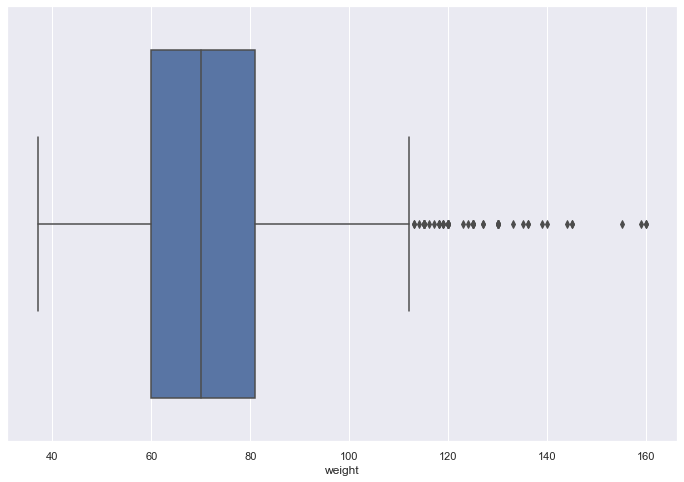

In [56]:
sns.boxplot(amostra_weight)

* - no boxplot vizualizamos varios outliers, mostrando que a distribuição não é normal

### Q-Q plot para dados não normais !!!

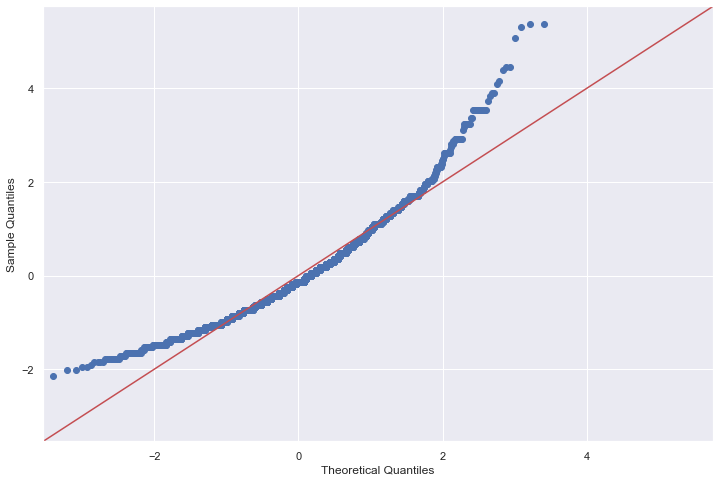

In [57]:
sm.qqplot(amostra_weight, fit=True, line="45");

## Questão 4

Realize uma transformação logarítmica em na amostra de `weight` da questão 3 e repita o mesmo procedimento. Podemos afirmar a normalidade da variável transformada ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

In [59]:
# transformação logarítmica
log = np.log(amostra_weight)

In [62]:
def q4():
    # Retorne aqui o resultado da questão 4.
    sts, p_value = sct.normaltest(log)
    print(sts, p_value)
    alpha = 0.05
    if p_value > alpha:
        return True
    else:
        return False
    pass
q4()

45.91534331977353 1.0705572101256944e-10


False

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Você esperava um resultado diferente agora?

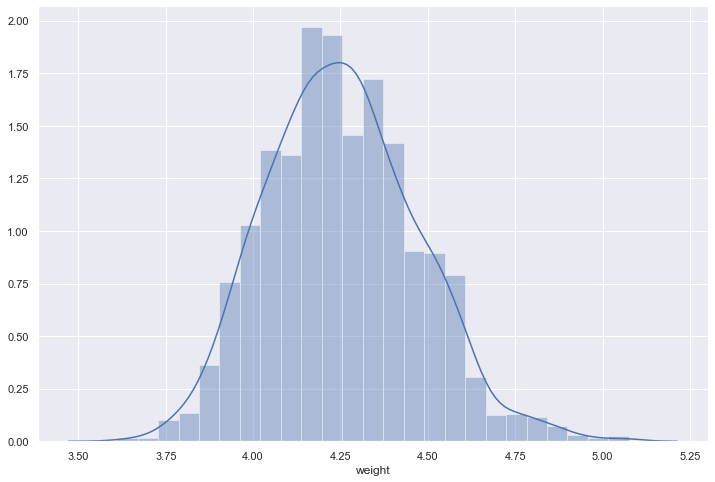

In [64]:
sns.distplot(log, bins=25)

* - os dados estão bem parecidos com uma distribuição normal 

### Q-Q plot bem proximo de uma distribuição normal
* não esperava uma mudança tão grande

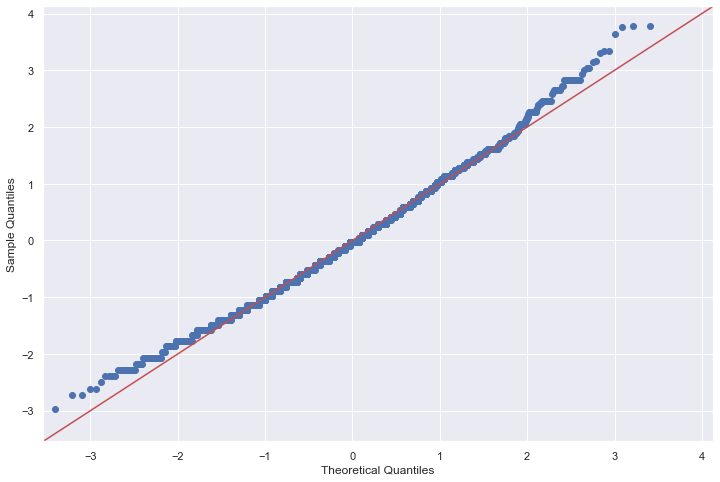

In [63]:
sm.qqplot(log, fit=True, line="45");

> __Para as questão 5 6 e 7 a seguir considere todos testes efetuados ao nível de significância de 5%__.

## Questão 5

Obtenha todos atletas brasileiros, norte-americanos e canadenses em `DataFrame`s chamados `bra`, `usa` e `can`,respectivamente. Realize um teste de hipóteses para comparação das médias das alturas (`height`) para amostras independentes e variâncias diferentes com a função `scipy.stats.ttest_ind()` entre `bra` e `usa`. Podemos afirmar que as médias são estatisticamente iguais? Responda com um boolean (`True` ou `False`).

In [65]:
bra = athletes[athletes.nationality == 'BRA']
usa = athletes[athletes.nationality == 'USA']
can = athletes[athletes.nationality == 'CAN']

In [73]:
bra_x_usa = sct.ttest_ind(bra.height, usa.height, equal_var=False, nan_policy='omit')
bra_x_usa[1]

0.0013080041830140115

In [79]:
def q5():
    # Retorne aqui o resultado da questão 5.
    bra_x_usa = sct.ttest_ind(bra['height'], usa["height"], equal_var=False, nan_policy='omit')
    alpha = 0.05
    if bra_x_usa[1] > alpha:
        return True
    else:
        return False
    pass
q5()

False

## Questão 6

Repita o procedimento da questão 5, mas agora entre as alturas de `bra` e `can`. Podemos afimar agora que as médias são estatisticamente iguais? Reponda com um boolean (`True` ou `False`).

In [83]:
def q6():
    # Retorne aqui o resultado da questão 6.
    bra_x_can = sct.ttest_ind(bra['height'], can["height"], equal_var=False, nan_policy='omit')
    alpha = 0.05
    if bra_x_can[1] > alpha:
        return True
    else:
        return False
    pass
q6()

True

## Questão 7

Repita o procedimento da questão 6, mas agora entre as alturas de `usa` e `can`. Qual o valor do p-valor retornado? Responda como um único escalar arredondado para oito casas decimais.

In [86]:
def q7():
    # Retorne aqui o resultado da questão 7.
    usa_x_can = sct.ttest_ind(usa['height'], can["height"], equal_var=False, nan_policy='omit')
    alpha = 0.05
    return float(round(usa_x_can[1],8))
q7()

0.00046601

__Para refletir__:

* O resultado faz sentido?
* Você consegue interpretar esse p-valor?
* Você consegue chegar a esse valor de p-valor a partir da variável de estatística?